# Machine Learning Classifiers for Ethereum Algorithmic Trading

## Background

In this workbook, we've trained support vector machine (SVM) model to make trading predictions, backtested the results, and then evaluated its performance compared to that of a logistic regression model.

## References

* [SKLearn SVM - SVC Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

* [SKLearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

In [3]:
# Imports
import pandas as pd
from pathlib import Path
import san

### Read the CSV file into Pandas DataFrame

In [8]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = san.get(
    "ohlcv/ethereum",
    from_date="2018-12-01",
    to_date="2021-12-01",
    interval="1d"
)

trading_df.columns = ['open', 'close', 'high', 'low', 'volume', 'marketcap']

# Review the DataFrame
trading_df.head()

,open,close,high,low,volume,marketcap
datetime,,,,,,
2018-12-01 00:00:00+00:00,113.397762,118.635559,120.841454,111.541072,2.131476e+09,1.228412e+10
2018-12-02 00:00:00+00:00,118.268151,116.388899,120.562047,116.092041,1.856199e+09,1.205377e+10
2018-12-03 00:00:00+00:00,116.398687,108.925018,116.619068,107.312815,1.772756e+09,1.128291e+10
2018-12-04 00:00:00+00:00,108.756033,110.214190,113.142914,107.402721,1.748116e+09,1.141862e+10
2018-12-05 00:00:00+00:00,110.335518,102.475556,110.641389,102.475556,1.990158e+09,1.061888e+10


### Add a daily return values column to the DataFrame

In [9]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,open,close,high,low,volume,marketcap,actual_returns
datetime,,,,,,,
2018-12-02 00:00:00+00:00,118.268151,116.388899,120.562047,116.092041,1.856199e+09,1.205377e+10,-0.018937
2018-12-03 00:00:00+00:00,116.398687,108.925018,116.619068,107.312815,1.772756e+09,1.128291e+10,-0.064129
2018-12-04 00:00:00+00:00,108.756033,110.214190,113.142914,107.402721,1.748116e+09,1.141862e+10,0.011835
2018-12-05 00:00:00+00:00,110.335518,102.475556,110.641389,102.475556,1.990158e+09,1.061888e+10,-0.070214
2018-12-06 00:00:00+00:00,102.422572,91.804131,104.103496,91.761056,2.311803e+09,9.514882e+09,-0.104136


,open,close,high,low,volume,marketcap,actual_returns
datetime,,,,,,,
2021-11-27 00:00:00+00:00,4051.504075,4096.912088,4183.617228,4039.785363,1.651569e+10,4.855480e+11,0.016374
2021-11-28 00:00:00+00:00,4101.648807,4294.453696,4296.864380,3995.281552,1.595313e+10,5.090167e+11,0.048217
2021-11-29 00:00:00+00:00,4296.946820,4445.105008,4458.878297,4288.870364,1.908648e+10,5.269313e+11,0.035080
2021-11-30 00:00:00+00:00,4442.159127,4631.478795,4735.379577,4359.853336,2.862635e+10,5.490858e+11,0.041928
2021-12-01 00:00:00+00:00,4623.679444,4586.990131,4777.826422,4530.272580,2.763483e+10,5.438712e+11,-0.009606


---

### Generating the Features and Target Sets

In [10]:
# Import the finta Python library and the TA module
from finta import TA

In [14]:
# Create a signals_df DataFrame that is a copy of the ixn_df Dataframe
signals_df = trading_df.copy()

# Set the short window and long windows
short_window = 50
long_window = 200

# Add the SMA technical indicators for the short and long windows
signals_df["sma_fast"] = TA.SMA(signals_df, short_window)
signals_df["sma_slow"] = TA.SMA(signals_df, long_window)

In [15]:
# Drop the NaNs using dropna()
signals_df = signals_df.dropna()
signals_df.head()

,open,close,high,low,volume,marketcap,actual_returns,sma_fast,sma_slow
datetime,,,,,,,,,
2019-06-19 00:00:00+00:00,265.071659,269.431798,270.309516,264.817435,5.516511e+09,2.871078e+10,0.016525,234.051936,158.616174
2019-06-20 00:00:00+00:00,268.840289,271.695017,274.008043,265.628857,6.408981e+09,2.895566e+10,0.008400,236.269469,159.392705
2019-06-21 00:00:00+00:00,272.057850,294.910280,295.303302,272.057850,9.331694e+09,3.143377e+10,0.085446,238.926172,160.322631
2019-06-22 00:00:00+00:00,295.908297,309.380305,315.189720,294.728230,1.061373e+10,3.298034e+10,0.049066,241.754730,161.318462
2019-06-23 00:00:00+00:00,309.900854,307.827784,318.436039,305.764594,8.161062e+09,3.281904e+10,-0.005018,244.630754,162.345223


#### Create the features set

In [16]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = signals_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
datetime,,
2019-06-19 00:00:00+00:00,234.051936,158.616174
2019-06-20 00:00:00+00:00,236.269469,159.392705
2019-06-21 00:00:00+00:00,238.926172,160.322631
2019-06-22 00:00:00+00:00,241.754730,161.318462
2019-06-23 00:00:00+00:00,244.630754,162.345223


,sma_fast,sma_slow
datetime,,
2021-11-27 00:00:00+00:00,4211.379447,3144.467955
2021-11-28 00:00:00+00:00,4225.754184,3147.010981
2021-11-29 00:00:00+00:00,4246.139227,3150.660763
2021-11-30 00:00:00+00:00,4267.861722,3153.422870
2021-12-01 00:00:00+00:00,4289.750059,3158.167211


#### Create the target set

In [18]:
# Create a new column in the trading_df called signal setting its value to zero.
signals_df["signal"] = 0.0

In [19]:
# Create the signal to buy
signals_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [20]:
# Create the signal to sell
signals_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [21]:
# Copy the new signal column to a new Series called y.
y = signals_df["signal"].copy()

---

### Split the Data Into Training and Testing Datasets

#### Creating the Training Datasets

In [22]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [23]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2019-06-19 00:00:00+00:00


In [24]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2019-09-19 00:00:00+00:00


In [25]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
datetime,,
2019-06-19 00:00:00+00:00,234.051936,158.616174
2019-06-20 00:00:00+00:00,236.269469,159.392705
2019-06-21 00:00:00+00:00,238.926172,160.322631
2019-06-22 00:00:00+00:00,241.754730,161.318462
2019-06-23 00:00:00+00:00,244.630754,162.345223


#### Creating the Testing Datasets

In [26]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
datetime,,
2019-09-19 00:00:00+00:00,194.433018,206.540982
2019-09-20 00:00:00+00:00,194.437851,206.994934
2019-09-21 00:00:00+00:00,194.390264,207.383026
2019-09-22 00:00:00+00:00,194.174721,207.747646
2019-09-23 00:00:00+00:00,193.759753,208.067080


#### Standardizing the Data

In [27]:
# Imports
from sklearn.preprocessing import StandardScaler

In [28]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [29]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [30]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.58      0.26      0.36        42
         1.0       0.58      0.84      0.69        51

    accuracy                           0.58        93
   macro avg       0.58      0.55      0.52        93
weighted avg       0.58      0.58      0.54        93



---

### Backtesting a Machine Learning Trading Algorithm

In [32]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [33]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.47      0.05      0.10       367
         1.0       0.54      0.95      0.69       438

    accuracy                           0.54       805
   macro avg       0.50      0.50      0.39       805
weighted avg       0.51      0.54      0.42       805



In [34]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = signals_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
display(predictions_df.head())
display(predictions_df.tail())

,predicted_signal,actual_returns,trading_algorithm_returns
datetime,,,
2019-09-19 00:00:00+00:00,1.0,0.046775,0.046775
2019-09-20 00:00:00+00:00,1.0,-0.014600,-0.014600
2019-09-21 00:00:00+00:00,1.0,-0.011620,-0.011620
2019-09-22 00:00:00+00:00,1.0,-0.017646,-0.017646
2019-09-23 00:00:00+00:00,1.0,-0.046251,-0.046251


,predicted_signal,actual_returns,trading_algorithm_returns
datetime,,,
2021-11-27 00:00:00+00:00,1.0,0.016374,0.016374
2021-11-28 00:00:00+00:00,1.0,0.048217,0.048217
2021-11-29 00:00:00+00:00,1.0,0.035080,0.035080
2021-11-30 00:00:00+00:00,1.0,0.041928,0.041928
2021-12-01 00:00:00+00:00,1.0,-0.009606,-0.009606


<AxesSubplot:xlabel='datetime'>

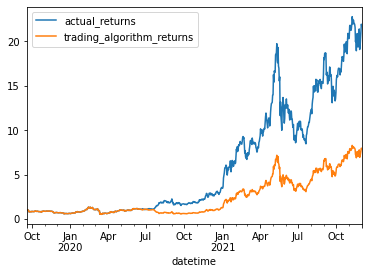

In [35]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

---

# Add a New Machine Learning Model

## Import the `LogisticRegression` model from scikit-learn.


In [36]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [37]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

In [38]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [39]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [40]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.45      0.48        42
         1.0       0.58      0.63      0.60        51

    accuracy                           0.55        93
   macro avg       0.54      0.54      0.54        93
weighted avg       0.54      0.55      0.55        93



## Backtest the `LogisticRegression` model using the testing data to evaluate its performance.

In [41]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [42]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.58      0.49       367
         1.0       0.49      0.34      0.40       438

    accuracy                           0.45       805
   macro avg       0.46      0.46      0.45       805
weighted avg       0.46      0.45      0.44       805



## Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data. 

In [43]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.58      0.49       367
         1.0       0.49      0.34      0.40       438

    accuracy                           0.45       805
   macro avg       0.46      0.46      0.45       805
weighted avg       0.46      0.45      0.44       805



In [44]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.47      0.05      0.10       367
         1.0       0.54      0.95      0.69       438

    accuracy                           0.54       805
   macro avg       0.50      0.50      0.39       805
weighted avg       0.51      0.54      0.42       805



### Answer the following question:

**Question:** Did the `LogisticRegression` perform better than the `SVM`?

**Answer:** No! The SVM model performs a bit better than the logistic regression model since it has a higher accuracy score (54% to 45%).